# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   José de Jesús Peña Rodríguez    A01794940
*   Gustavo Pérez Juárez            A01795310
*   Anghelo Daniel Pérez Martínez   A01795323
*   Rafael Alexis Pinto Flores      A01794500
*   Irene Plascencia Villalobos     A01625258








In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
# Incluye aquí todas las librerías y paquetes que requieras.


import os
import re
import pandas as pd
import json
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


##**Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [2]:
# Leer el archivo de texto
with open('noticiasTopicModeling.txt', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extraer los cuerpos de texto
cuerpos_texto = [item['texto'] for item in data]

# Crear el DataFrame
df = pd.DataFrame(cuerpos_texto, columns=['Cuerpo_text'])
print(df)

                                            Cuerpo_text
0     "España ha dejado de ser católica", decía Manu...
1     El clima de crispación social en Ceuta ha lleg...
2     El Gobierno ha alegado la suspensión de plazos...
3     Puedes mandar tu pregunta, sugerencia o queja ...
4     Panamá debe entregar esta semana a la Corte In...
...                                                 ...
5653  El juez del caso Villarejo, Manuel García-Cast...
5654  España se acerca a los 260.000 casos de COVID-...
5655  Transferencias, préstamos y condiciones. "Nunc...
5656  El 14 de marzo, ante la declaración del estado...
5657  Madrid, 1 sep (EFE).- Finalmente, septiembre h...

[5658 rows x 1 columns]


In [3]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cuerpo_text  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


In [4]:
# Y veamos sus primeros registros:

df.head()

,Cuerpo_text
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [5]:
mis_stopwords_esp=[]
mis_stopwords_esp=stopwords.words('spanish')
len(mis_stopwords_esp)
print(mis_stopwords_esp[:15])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con']


In [6]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

def clean_acents(texto):
    acentos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
        'ñ': 'n', 'Ñ': 'N'
    }
    
    def reemplazar(match):
        char = match.group(0)
        return acentos.get(char, char)
    
    patron = re.compile('|'.join(re.escape(key) for key in acentos.keys()))
    
    return patron.sub(reemplazar, texto)

def clean_tok(doc):
    # Reemplazar caracteres con acentos
    doc_stp1 = clean_acents(doc)
    doc_stp1 = re.sub(r'[^a-zA-Z]', ' ', doc_stp1)
    # Conversión a minúsculas 
    doc_stp2 = doc_stp1.lower()
    # Separar el texto en tokens
    tokens = [word for word in doc_stp2.split() if word not in mis_stopwords_esp]
    # Filtrar tokens por longitud
    long_token = 1
    filtered_tokens = [word for word in tokens if len(word) > long_token]
    return filtered_tokens

In [7]:
noticias=df.Cuerpo_text

In [8]:
# Aplicamos el proceso de limpieza y tokenización:
limpieza_token = [clean_tok(noticia) for noticia in noticias]

In [9]:
limpieza_token_str = [', '.join(tokens) for tokens in limpieza_token]
serie = pd.Series(limpieza_token_str)
df_tokens = pd.DataFrame(serie, columns=['Tokens'])

In [10]:
df_tokens.head(5)

,Tokens
0,"espana, dejado, ser, catolica, decia, manuel, ..."
1,"clima, crispacion, social, ceuta, llegado, pun..."
2,"gobierno, alegado, suspension, plazos, derivad..."
3,"puedes, mandar, pregunta, sugerencia, queja, t..."
4,"panama, debe, entregar, semana, corte, interam..."


In [11]:
import spacy
nlp = spacy.load("es_core_news_sm")

def process_tokens(lista_tokens):

    #Unimos la lista de tokens 
    texto = " ".join(lista_tokens)

    #Procesamos el texto con spacy
    processing_text=nlp(texto)

    #Creamos una lista nueva con los tokens procesados 
    lista_tokens_lema=[token_lema.lemma_ for token_lema in processing_text]

    #Creamos una lista vacia en donde guardaremos los tokens 
    lista_tokens_no_repetidos=[]

    for token in lista_tokens_lema:
        if token not in lista_tokens_no_repetidos:
            lista_tokens_no_repetidos.append(token)
    
    return lista_tokens_no_repetidos

In [12]:
tokens_lematizados = [process_tokens(noticia) for noticia in limpieza_token]

In [13]:
df_tokens_lema = pd.Series(tokens_lematizados)
df_tokens_lema = pd.DataFrame(serie, columns=['Tokens_procesados'])
df_tokens_lema

,Tokens_procesados
0,"espana, dejado, ser, catolica, decia, manuel, ..."
1,"clima, crispacion, social, ceuta, llegado, pun..."
2,"gobierno, alegado, suspension, plazos, derivad..."
3,"puedes, mandar, pregunta, sugerencia, queja, t..."
4,"panama, debe, entregar, semana, corte, interam..."
...,...
5653,"juez, caso, villarejo, manuel, garcia, castell..."
5654,"espana, acerca, casos, covid, confirmados, ini..."
5655,"transferencias, prestamos, condiciones, nunca,..."
5656,"marzo, declaracion, alarma, decreto, medidas, ..."


Parte 1: Indexación semántica latente (LSI):

3. Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con
algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el
significado de cada renglón? ¿Y el significado de cada columna?

In [14]:
vectorizador = TfidfVectorizer()
matrix_tfidf = vectorizador.fit_transform(df_tokens_lema['Tokens_procesados'])
features_names= vectorizador.get_feature_names_out()
df_tfidf = pd.DataFrame(matrix_tfidf.toarray(), columns=features_names)
df_tfidf

,aa,aaas,aac,aahjko,aai,aaim,aaiun,aalla,aamir,aamma,...,zurron,zutik,zuzendaritzaren,zuzeneko,zvi,zwift,zwvy,zxs,zxsptbgxnd,zyed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con
10 componentes y obtener el gráfico de la importancia relativa de estas.

In [15]:
svd = TruncatedSVD(n_components=10)
matrix_svd= svd.fit_transform(matrix_tfidf)
df_matrix_svd = pd.DataFrame(matrix_svd)
df_matrix_svd

,0,1,2,3,4,5,6,7,8,9
0,0.175456,-0.108677,0.049798,-0.006373,-0.039308,0.092205,-0.075305,-0.079847,-0.002229,0.029256
1,0.214104,-0.136793,0.103365,-0.019696,-0.048095,0.038288,-0.050756,-0.037434,0.002440,-0.012401
2,0.118294,0.006974,-0.005493,-0.016086,0.041021,-0.008400,0.015726,-0.005052,-0.027366,-0.019013
3,0.263049,-0.059129,-0.080820,-0.001226,0.028136,0.038450,-0.057058,0.035537,0.094281,-0.016400
4,0.114662,0.036704,-0.027617,-0.022389,0.030200,0.003995,-0.000456,-0.001170,-0.043454,-0.007125
...,...,...,...,...,...,...,...,...,...,...
5653,0.243226,-0.168618,0.075532,-0.053858,0.260396,-0.220232,0.062656,-0.168519,0.056910,-0.113424
5654,0.361091,0.237491,-0.006998,0.032564,-0.000689,-0.082439,-0.169277,-0.067008,-0.098183,0.064137
5655,0.227446,-0.023741,-0.099159,-0.043485,-0.023375,0.107255,0.149630,-0.084921,-0.136653,0.137168
5656,0.200215,0.001488,-0.098769,-0.028176,0.058969,0.063219,-0.057302,0.000239,0.121438,-0.013474


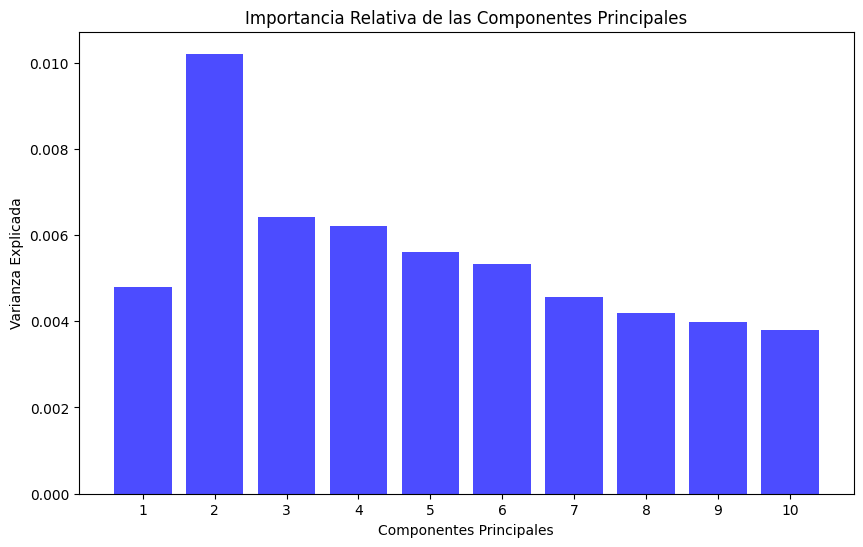

In [16]:
#Graficamos los compoentes latentes usando la media por columna
explained_variance = svd.explained_variance_ratio_
# Graficar la importancia relativa de las 10 componentes
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7, color='b', align='center')
plt.title('Importancia Relativa de las Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(range(1, 11))
plt.show()




5. Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉t de la descomposición SVD.
Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [17]:
#Se obtienen los componentes de la matrix vt
matrix_vt=svd.components_
df_vt=pd.DataFrame(matrix_vt,columns=features_names)
df_vt.head(5)


,aa,aaas,aac,aahjko,aai,aaim,aaiun,aalla,aamir,aamma,...,zurron,zutik,zuzendaritzaren,zuzeneko,zvi,zwift,zwvy,zxs,zxsptbgxnd,zyed
0,0.000145,0.000029,0.000152,0.000133,6.069815e-05,0.000019,0.000044,0.000098,0.000058,0.000024,...,0.000087,0.000067,0.000043,0.001002,0.000079,0.000049,0.000088,0.000065,0.000051,0.000024
1,0.000006,0.000013,-0.000120,0.000241,-9.298004e-06,-0.000015,-0.000034,-0.000094,-0.000071,-0.000009,...,-0.000066,-0.000068,-0.000074,-0.001316,0.000137,0.000005,-0.000300,-0.000177,-0.000040,-0.000027
2,-0.000249,-0.000073,-0.000214,0.000024,-9.259303e-05,-0.000048,-0.000056,-0.000219,0.000011,-0.000078,...,0.000127,0.000068,-0.000005,-0.000405,0.000002,-0.000102,0.000520,0.000183,-0.000060,-0.000039
3,-0.000085,0.000005,-0.000031,-0.000273,1.823039e-04,0.000006,-0.000058,-0.000050,0.000073,-0.000001,...,0.000572,0.000259,0.000195,0.007681,-0.000021,0.000008,-0.000023,0.000045,-0.000035,-0.000015
4,0.000110,0.000022,0.000266,-0.000116,-6.284542e-07,0.000039,-0.000006,0.000311,-0.000018,0.000048,...,-0.000160,-0.000154,0.000127,0.001818,-0.000023,0.000022,-0.000255,-0.000160,-0.000063,0.000119


In [18]:
df_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 97736 entries, aa to zyed
dtypes: float64(97736)
memory usage: 7.5 MB


6. Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada
uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de
dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?

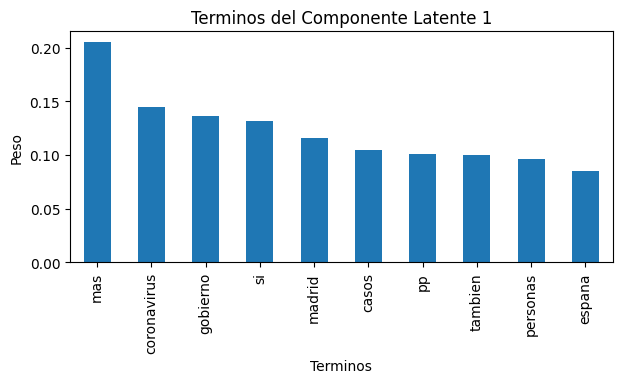

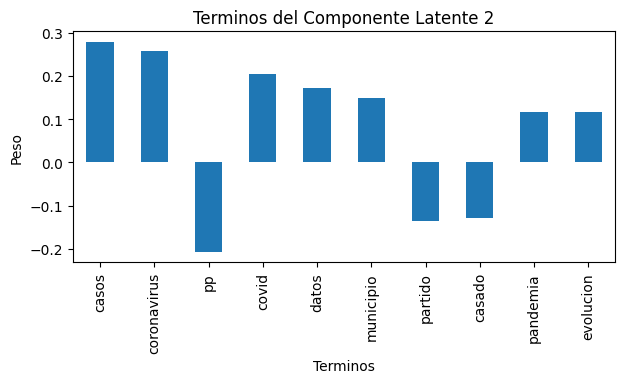

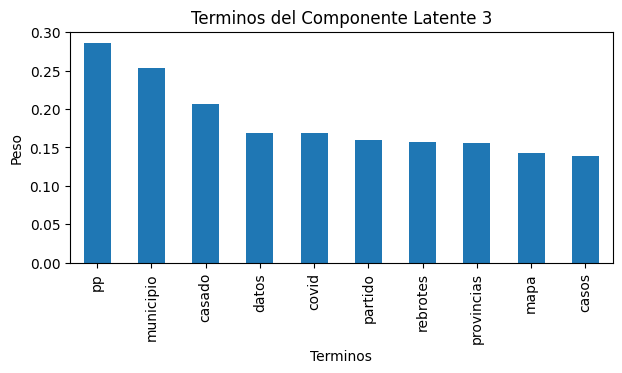

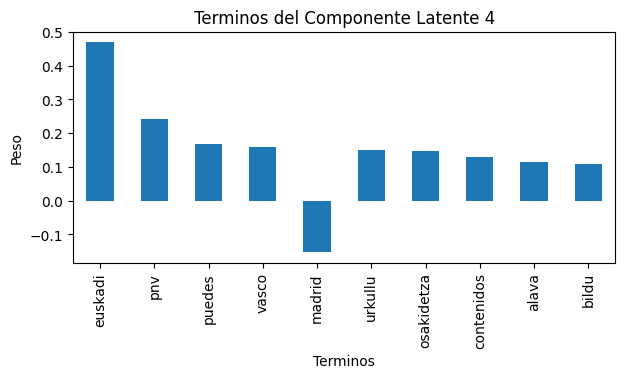

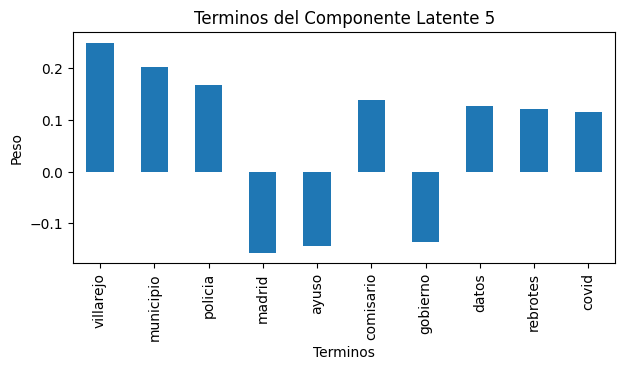

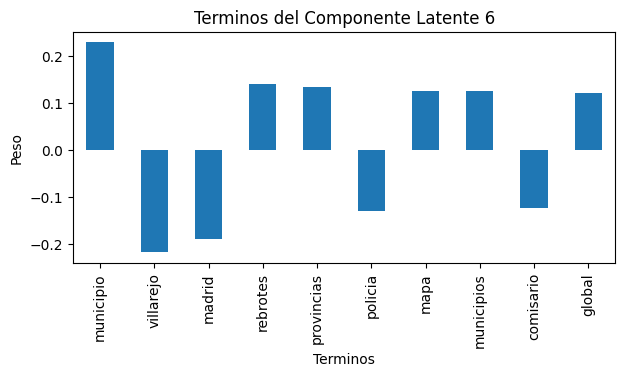

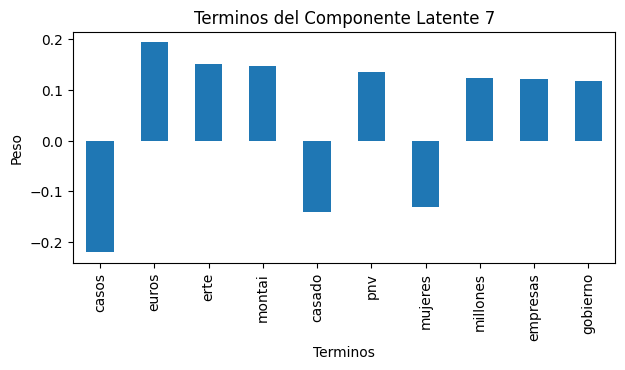

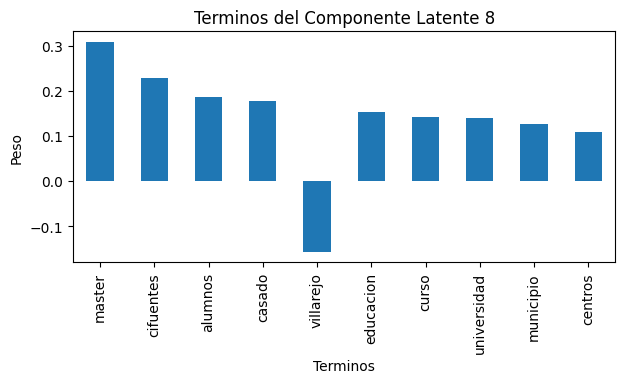

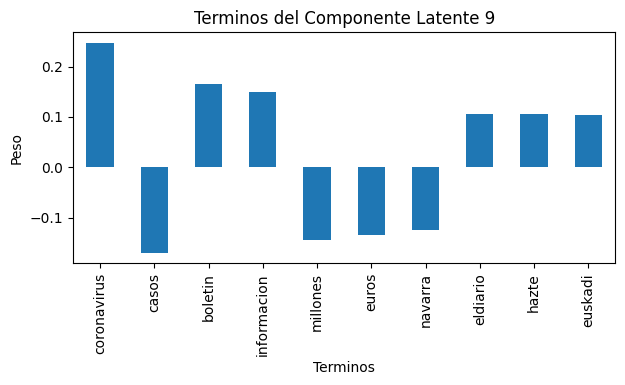

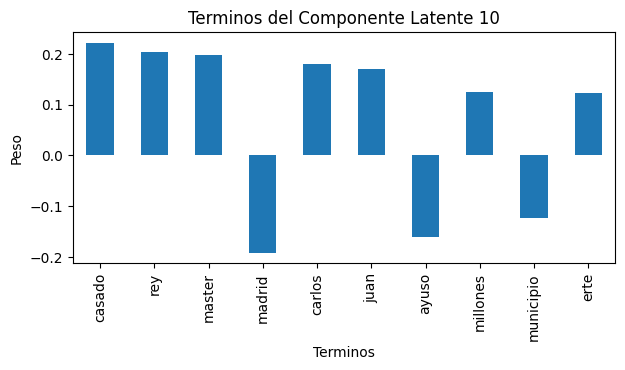

In [19]:
componente_lista = [n for n in range(10)]

for componente_index in componente_lista:
        
        componente = df_vt.iloc[componente_index]

        # Obtener los terminos más importantes del componente
        n_terminos_importantes = 10
        terminos_importantes = componente.abs().nlargest(n_terminos_importantes).index
        valores_importantes = componente[terminos_importantes]

        # Graficar los terminos más importantes del componente
        plt.figure(figsize=(7, 3))
        valores_importantes.plot(kind='bar')
        plt.title(f'Terminos del Componente Latente {componente_index + 1}')
        plt.xlabel('Terminos')
        plt.ylabel('Peso')

7. Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación
correspondiente y aplica de preferencia el modelo paralelizable:
https://radimrehurek.com/gensim/models/ldamodel.html
https://radimrehurek.com/gensim/models/ldamulticore.html